In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)

In [2]:
ipl = pd.read_csv('ipl_matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 3.1

1. Extract all genre, cvotes and votes: df_by_genre

In [5]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
[i for i in ipl.columns if 'team' in i]

# [i for i in movies.columns if 'genre' in i]
# [i for i in movies.columns if 'cvotes' in i]
# [i for i in movies.columns if 'votes' in i]

['team1', 'team2']

In [7]:
[i for i in ipl.columns if 'win_by' in i]

['win_by_runs', 'win_by_wickets']

In [8]:
df_by_genre = ipl[['team1', 'team2','win_by_runs', 'win_by_wickets']]

2. Add the cnt column with value as 1.

In [11]:
df_by_genre['cnt'] = 1

In [12]:
df_by_genre.head()

,team1,team2,win_by_runs,win_by_wickets,cnt
0,Sunrisers Hyderabad,Royal Challengers Bangalore,35,0,1
1,Mumbai Indians,Rising Pune Supergiant,0,7,1
2,Gujarat Lions,Kolkata Knight Riders,0,10,1
3,Rising Pune Supergiant,Kings XI Punjab,0,6,1
4,Royal Challengers Bangalore,Delhi Daredevils,15,0,1


3. Group on Genre-1, 2 and 3

In [13]:
g1 = df_by_genre.groupby('team1').sum()
g2 = df_by_genre.groupby('team2').sum()

In [14]:
g1.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,1785,228,89
Deccan Chargers,421,148,43
Delhi Capitals,92,17,6
Delhi Daredevils,700,265,72
Gujarat Lions,1,78,14


In [15]:
g2.head()

,win_by_runs,win_by_wickets,cnt
team2,,,
Chennai Super Kings,573,289,75
Deccan Chargers,539,72,32
Delhi Capitals,134,29,10
Delhi Daredevils,1453,275,89
Gujarat Lions,214,65,16


4. Add g1, g2 and g3 to creat df_add

In [17]:
df_add = g1.add(g2, fill_value = 0)

5. Filter df_add on cnt column where cnt>=10

**FOR DEMO PURPOSE I AM USING CNT>=100 BUT FOR YOU ASSIGNMENT THE FILTER IS CNT>=10**

In [18]:
df_add.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Deccan Chargers,960,220,75
Delhi Capitals,226,46,16
Delhi Daredevils,2153,540,161
Gujarat Lions,215,143,30


In [20]:
genre_top_10 = df_add[df_add['cnt']>=100]

In [21]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Delhi Daredevils,2153,540,161
Kings XI Punjab,2257,594,176
Kolkata Knight Riders,1971,646,178
Mumbai Indians,2874,583,187


6. Divide all columns with the cnt columns

In [22]:
genre_top_10.iloc[:,0:2 ] = genre_top_10.iloc[:, 0:2].divide(genre_top_10.cnt, axis = 0)

In [23]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.378049,3.152439,164
Delhi Daredevils,13.372671,3.354037,161
Kings XI Punjab,12.823864,3.375000,176
Kolkata Knight Riders,11.073034,3.629213,178
Mumbai Indians,15.368984,3.117647,187


7. Round off all votes columns to two decimal points

In [24]:
genre_top_10.iloc[:, 0] = round(genre_top_10.iloc[:, 0], 2)

In [25]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3.152439,164
Delhi Daredevils,13.37,3.354037,161
Kings XI Punjab,12.82,3.375000,176
Kolkata Knight Riders,11.07,3.629213,178
Mumbai Indians,15.37,3.117647,187


8. Convert all cvotes columns to int data type

In [26]:
genre_top_10.iloc[:, 1] = genre_top_10.iloc[:, 1].astype(int)

In [27]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3,164
Delhi Daredevils,13.37,3,161
Kings XI Punjab,12.82,3,176
Kolkata Knight Riders,11.07,3,178
Mumbai Indians,15.37,3,187


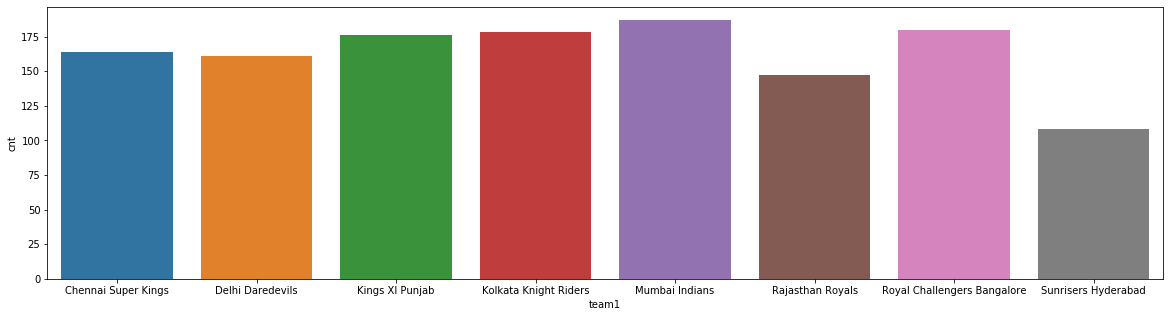

In [29]:
plt.figure(figsize = (20,5))
sns.barplot(x = genre_top_10.index, y = genre_top_10.cnt)

In [30]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3,164
Delhi Daredevils,13.37,3,161
Kings XI Punjab,12.82,3,176
Kolkata Knight Riders,11.07,3,178
Mumbai Indians,15.37,3,187


(8.0, 0.0)

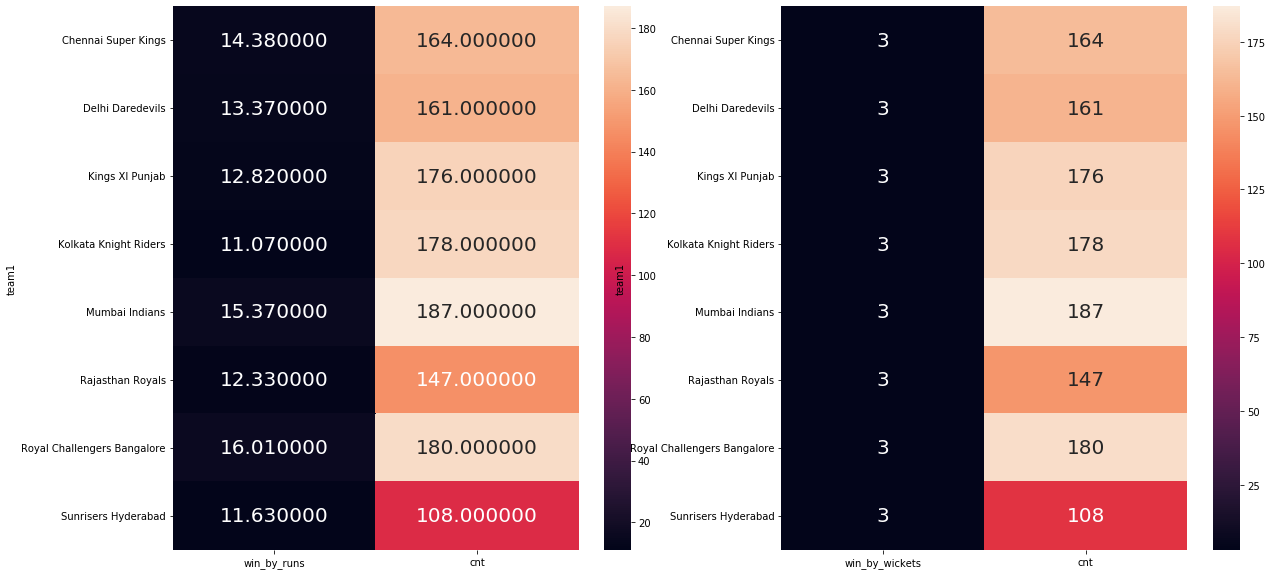

In [35]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
ax = sns.heatmap(genre_top_10[['win_by_runs', 'cnt']], annot = True, annot_kws = {'fontsize':20}, fmt = 'f')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

plt.subplot(1,2,2)
ax = sns.heatmap(genre_top_10[['win_by_wickets', 'cnt']], annot = True, annot_kws = {'fontsize':20}, fmt = 'd')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [36]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


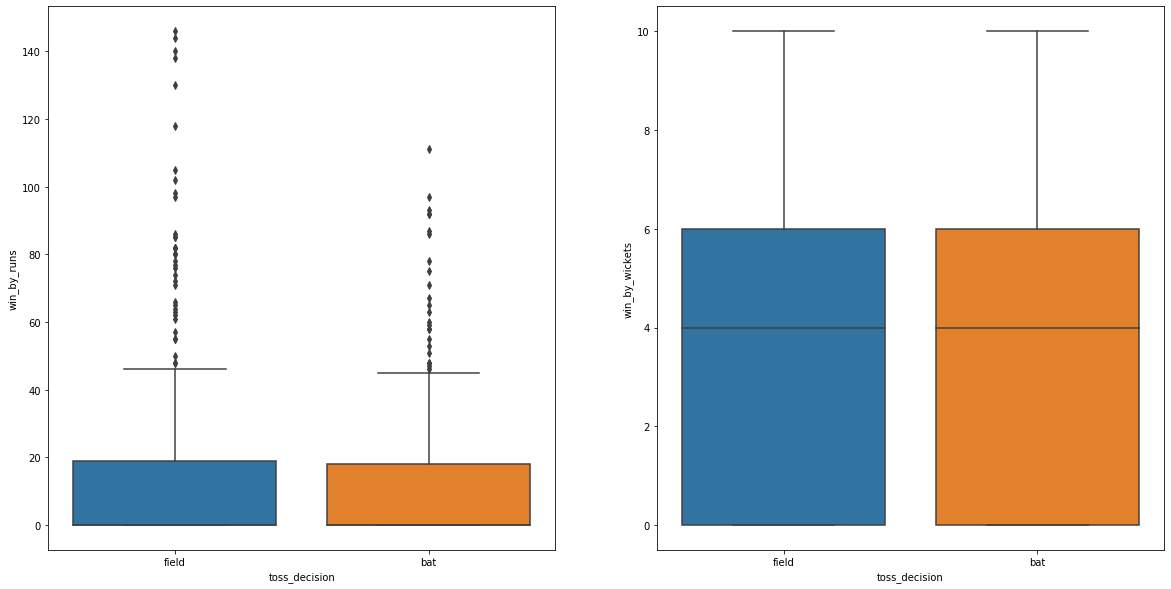

In [39]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'toss_decision', y = 'win_by_runs', data = ipl)

plt.subplot(1,2,2)
sns.boxplot(x = 'toss_decision', y = 'win_by_wickets', data = ipl)

In [41]:
top5 = ipl.head()

In [43]:
top5

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [46]:
top5[['team1', 'team2', 'toss_winner']].values.tolist()

[['Sunrisers Hyderabad',
  'Royal Challengers Bangalore',
  'Royal Challengers Bangalore'],
 ['Mumbai Indians', 'Rising Pune Supergiant', 'Rising Pune Supergiant'],
 ['Gujarat Lions', 'Kolkata Knight Riders', 'Kolkata Knight Riders'],
 ['Rising Pune Supergiant', 'Kings XI Punjab', 'Kings XI Punjab'],
 ['Royal Challengers Bangalore',
  'Delhi Daredevils',
  'Royal Challengers Bangalore']]